In [1]:
import pandas as pd

# Load the CSV file (make sure the path is correct)
file_path = 'disaster-events new.csv'  # Adjust this path if needed
df = pd.read_csv(file_path)

# Group by 'Year' and sum the 'Disasters' to get total disasters per year
total_disasters_per_year = df.groupby('Year')['Disasters'].sum().reset_index()
total_disasters_per_year.rename(columns={'Disasters': 'Total Disasters'}, inplace=True)

# Display the resulting table
print(total_disasters_per_year)

     Year  Total Disasters
0    1900               23
1    1901                3
2    1902               36
3    1903               43
4    1904               13
..    ...              ...
120  2020             1606
121  2021             1733
122  2022             1689
123  2023             1598
124  2024              324

[125 rows x 2 columns]


In [2]:
# Drop all rows where the year is before 1970 or equal to 2024
filtered_df = total_disasters_per_year[(total_disasters_per_year['Year'] >= 1970) & (total_disasters_per_year['Year'] != 2024)]

# Display the filtered DataFrame
print(filtered_df)

     Year  Total Disasters
70   1970              320
71   1971              261
72   1972              267
73   1973              293
74   1974              294
75   1975              272
76   1976              331
77   1977              465
78   1978              450
79   1979              438
80   1980              476
81   1981              539
82   1982              638
83   1983              864
84   1984              642
85   1985              667
86   1986              565
87   1987              712
88   1988              775
89   1989              664
90   1990             1058
91   1991              907
92   1992              847
93   1993             1048
94   1994              974
95   1995              977
96   1996              906
97   1997             1016
98   1998             1158
99   1999             1331
100  2000             1636
101  2001             1532
102  2002             1699
103  2003             1425
104  2004             1411
105  2005             1685
1

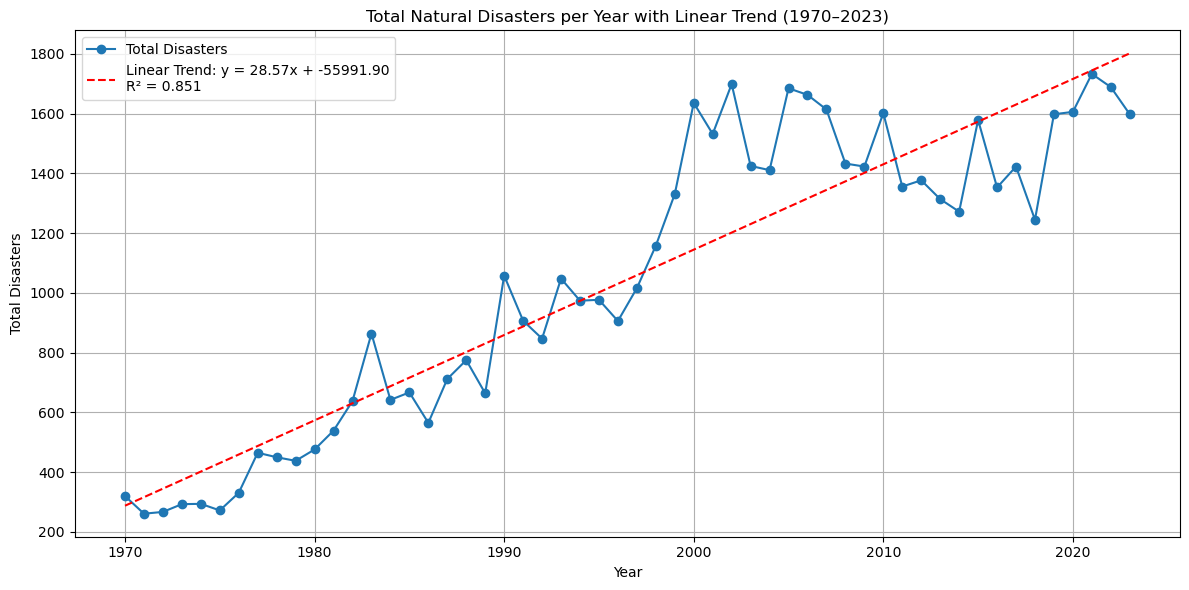

Slope: 28.57
Intercept: -55991.90
R²: 0.851


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Extract x (Year) and y (Total Disasters)
x = filtered_df['Year'].values
y = filtered_df['Total Disasters'].values

# Calculate linear regression coefficients
slope, intercept = np.polyfit(x, y, 1)
regression_line = slope * x + intercept

# Calculate R-squared
ss_res = np.sum((y - regression_line) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Plot the data and regression line
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', label='Total Disasters')
plt.plot(x, regression_line, color='red', linestyle='--',
         label=f'Linear Trend: y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.3f}')

# Customize the plot
plt.title('Total Natural Disasters per Year with Linear Trend (1970–2023)')
plt.xlabel('Year')
plt.ylabel('Total Disasters')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Print the regression coefficients and R-squared value
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R²: {r_squared:.3f}")

